# LION Classification Pipeline Notebook

This notebook demonstrates how to use the various classification pipelines in the LION package.

These are:
- Sentiment
- Zero Shot Topics
- Toxicity

NOTE: While a GPU is not a requirement, having one will greatly speed up the process of running this notebook. Google Colab and Akash are two good places to rent for reasonable rates.

## Setup

In [1]:
#install requirements
#!pip install -r cfg/requirements.txt

In [2]:
#suspend transformers warnings (you should only do this if your sure warnings can be ignored)
from transformers import logging
logging.set_verbosity_error()

In [3]:
#import the lion library
# initialize the lab
from lionOS.modules import liontools as lion

#import lionOS

lab = lion.Lab()
lab.initialize()

# validate api access
lab.validate()

# initialize the lion ai, data, and NetSci toolkits
ai = lion.AI()
data = lion.Data()
netsci = lion.NetSci()

Lab booting up...

GPU found. Lab compute accelerated.

OpenAI API credentials validated

Logging into Huggingface...

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid.
Your token has been saved to /home/jovyan/.cache/huggingface/token
Login successful



# Data

In [4]:
# load in our data
import pandas as pd 
df = pd.read_excel('discord.xlsx')
print('row count:', len(df.index))
df.tail()

row count: 200


,username,content,mentions,time_stamp
195,saulthorin,Nope. It was a default generated logo from a t...,FINE,2023-01-07 19:40:33
196,FINE,copy that!!,saulthorin,2023-01-07 19:51:09
197,Dimpal12345,Great community admin when snapshot ote start ...,NaN,2023-01-09 23:52:34
198,pradeepbora121,watts up,NaN,2023-01-10 05:34:02
199,sandeepdas,Dear @saulthorin#7696 thanks for speaking with...,saulthorin,2023-01-10 12:36:03


## Sentiment

Using the lion AI class, we can call `analyze_sentiment()` to get the sentiment of a message.

In [5]:
# create our doc object containing a sampled message
doc = df.content.sample().values[0]

# run sentiment analysis
sent = ai.analyze_sentiment(doc)

# display our result
print(doc, '\n\nSentiment scores:', sent)

There is no tokenomics research group yet. There is some info on $TALENT but it's not easy to find because we have not published a public white paper yet. Not until we have some legal logistics finalized. 

Here is a deck tho that talks about it. It's a total 200M supply with a ve$TALENT lock up model for governance. 

https://docs.google.com/presentation/d/1dN0XnvwPZu-y4iSriIK9y5KWgMXsddekNNoIQxdd86Q/edit?usp=sharing 

Sentiment scores: [{'label': 'neutral', 'score': 0.5135126709938049}]


Now that we can see how this works, we can apply it to our dataframe using `get_sentiment_features()` to update our dataset.

In [6]:
# run the function
ai.get_sentiment_features(df)
# check out the results
df.sample(5)

,username,content,mentions,time_stamp,label,score
89,Mr.Nobody,This one summary is good too: \n> Decentralize...,NaN,2022-10-14 08:36:16,positive,0.787158
158,liagodoyf,I'm halfway through an its been one of the bes...,FINE,2022-12-14 18:16:19,positive,0.984075
157,FINE,DEEPLY Curious now🤠,liagodoyf,2022-12-14 16:45:12,neutral,0.750901
10,lisawocken,https://cdn.discordapp.com/attachments/9236529...,NaN,2022-09-23 13:40:51,neutral,0.804292
192,mines,Holla,NaN,2023-01-06 21:12:10,positive,0.569490


Using the `get_sentiment_stats()` function of the Data class we can learn a bit more about the sentiment on our discord server.

In [7]:
data.get_sentiment_stats(df)

,label,count,mean,std,median,min,max
2,positive,98,0.833134,0.158442,0.902178,0.453612,0.988249
1,neutral,92,0.747156,0.147445,0.775310,0.472392,0.959531
0,negative,10,0.674724,0.124659,0.669746,0.499417,0.876685


## Topics

Here will use GPT-3 to do some zeroShot topic classifcation for us using the `gpt_zShot_topic()` function of the AI class.

In [8]:
# create our doc object containing a sampled message
doc = df.content.sample().values[0]

# generate a class
zero_shot_topic = ai.gpt_zShot_topic(doc)

# display our result
print(doc, '\n\nTopic:', zero_shot_topic)

any mod? 

Topic:  Technology


Like we previously did with sentiment, we can apply these topics to the dataframe. A simple apply function does the trick in this situation.

In [9]:
#apply the func tot the dataframe
df["zShot_Topic"] = df["content"].apply(ai.gpt_zShot_topic).str.lstrip()
df.head()

,username,content,mentions,time_stamp,label,score,zShot_Topic
0,Naiem,Completed task but still showing not eligible,NaN,2022-09-22 08:09:06,negative,0.631094,Task Completion
1,Naiem,🥲,NaN,2022-09-22 08:09:51,neutral,0.561305,Mental Health
2,Naiem,any mod?,NaN,2022-09-22 08:12:07,neutral,0.878583,Technology
3,Joras,Good,NaN,2022-09-22 08:22:35,positive,0.684437,Positive
4,kushal,HELLO TEAM,NaN,2022-09-22 08:31:03,positive,0.686160,Greeting


Since this uses a zero shot approach, our topics will vary significantly. Luckily, there is a function for that to. Using the `normalize_gpTopics()` function of the AI class, we can update our dataframe with parent topics for each of the topics we got using our zero shot approach. This should make things more easily for analysis.

In [10]:
#run the function
ai.normalize_gpTopics(df)
#view a sample of the outputs
df.sample(10)

,username,content,mentions,time_stamp,label,score,zShot_Topic,gpt_normalized_Topic
65,FINE,Burned out yo😅 I think you can relate too,Iamoptimist,2022-10-07 19:52:40,neutral,0.486933,Mental Health,Well-being
19,exodus-exodus.eth,https://twitter.com/banklessDAO/status/1574735...,NaN,2022-09-27 12:30:47,positive,0.577683,Cryptocurrency,Cryptocurrency
76,Arunacone,Gm Mr.Nobody#0187 Erin#2268 Have signed now up...,"Mr.Nobody, Erin",2022-10-12 14:41:11,positive,0.914106,Sign-up Confirmation,Confirmation
87,Mr.Nobody,Check this discussion too:,NaN,2022-10-14 08:35:07,neutral,0.782708,Discussion,Discussion
179,FINE,I try not to define things so new but rather d...,saulthorin,2022-12-26 18:20:55,positive,0.775560,Creative Thinking,Thinking
139,saulthorin,Thanks for joining 🫵,exodus-exodus.eth,2022-12-02 18:29:15,positive,0.959902,Appreciation,Gratitude
183,FINE,Happy New Year🥳⚡,NaN,2022-12-31 17:30:03,positive,0.983653,Holidays,Organization
114,Bharathi,Am I in??,NaN,2022-11-10 04:28:20,neutral,0.922652,Participation,Participation
151,saulthorin,Maybe share article in <#889871317808087050> f...,maximus,2022-12-13 13:20:39,positive,0.774028,Research,Research
55,iSpeakNerd.eth,"wait, you got a punk?!??",saulthorin,2022-10-03 23:50:24,neutral,0.630955,Surprise,Shock


Lets see how well this worked by counting the unique topics in each column.

In [11]:
#compare to topic column
print('Topic count:', df.zShot_Topic.nunique())
print('Parent topic count:', df.gpt_normalized_Topic.nunique())

Topic count: 141
Parent topic count: 100


Now we can a quick look at our new set of topics this using `value_counts()`.

In [12]:
df.gpt_normalized_Topic.value_counts()

Communication     19
Cryptocurrency    10
Organization       8
Success            7
Gratitude          6
                  ..
Travel             1
Questions          1
Scheduling         1
Greetings          1
Sustainability     1
Name: gpt_normalized_Topic, Length: 100, dtype: int64

To understand the relationship between users and topics, we might consider visualizing these relatinoships on a network graph using `map_topic_net()`.

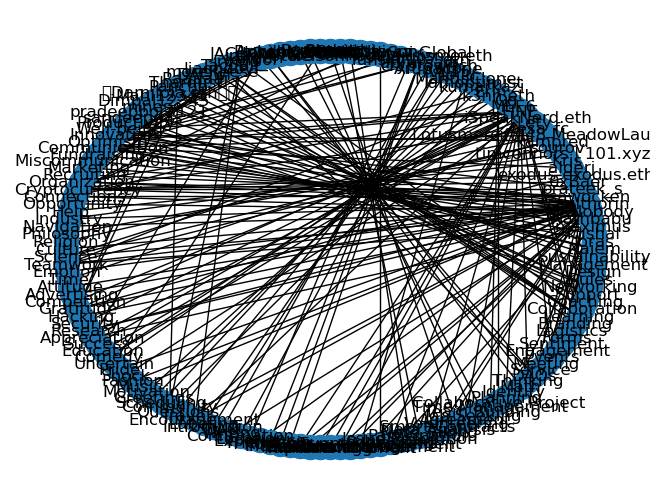

In [15]:
#disable font related warnings
import warnings
warnings.simplefilter("ignore")

#run the topic network func
topic_network, G = netsci.map_topic_net(df, circular=True)
#display
topic_network

Woah! Lots to unpack there. `map_topic_network()` also returns a graph object `G` for use with other libraries. Here is an example of using `G` with `pyvis` to create an interactive network.

In [14]:
from pyvis.network import Network

net = Network(notebook=True)
net.from_nx(G)
net.show('network.html')

network.html


## This concludes our demo of Project LION!

We plan to release much more in the future. If you'd like to contribute, join us in the talentDAO discord and select the research guild role. Contributors are welcome to submit pull request in the Project LION github repo.